In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.feature_selection import VarianceThreshold
from sklearn.base import ClassNamePrefixFeaturesOutMixin
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

Skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

train.csv - the training dataset; 

Status is the categorical target:

C (censored) indicates the patient was alive at N_Days,

CL indicates the patient was alive at N_Days due to liver a transplant,

D indicates the patient was deceased at N_Days.



test.csv - the test dataset; my objective is to predict the probability of each of the three Status values, e.g. 
Status_C, Status_CL, Status_D.

In [3]:
data_train = pd.read_csv('/home/the_rogue/Python_Project/Python_DataSets_file_/com_train.csv')

data_test = pd.read_csv('/home/the_rogue/Python_Project/Python_DataSets_file_/com_test.csv')

In [4]:
data_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [5]:
data_test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [6]:
data_train.isna().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [8]:
data_train.shape, data_test.shape

((7905, 20), (5271, 19))

In [9]:
data_train.groupby('Status')['id'].count()

Status
C     4965
CL     275
D     2665
Name: id, dtype: int64

In [10]:
data_train['Status_C']= data_train['Status'].map({'C': 1, 'CL': 0, 'D': 0})
data_train['Status_CL']= data_train['Status'].map({'C': 0, 'CL': 1, 'D': 0})
data_train['Status_D']= data_train['Status'].map({'C': 0, 'CL': 0, 'D': 1})
data_train['Status_map']= data_train['Status'].map({'C': 0, 'CL': 1, 'D': 2})

In [11]:
data_train['Status_C'].value_counts()

Status_C
1    4965
0    2940
Name: count, dtype: int64

In [12]:
data_train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status_C,Status_CL,Status_D,Status_map
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511,0.628083,0.034788,0.337128,0.709045
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511,0.483347,0.183254,0.472759,0.938439
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000,1.000000,0.000000,0.000000,0.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000,1.000000,0.000000,1.000000,2.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000,1.000000,1.000000,1.000000,2.000000


In [13]:
data_test.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000
mean,10540.000000,2038.696642,18497.756782,2.600389,352.486435,3.538071,84.701679,1811.233314,113.587526,115.286094,264.023715,10.632865,3.036995
std,1521.750965,1086.843490,3583.898801,3.852395,200.438989,0.354886,77.542064,1935.351492,48.964789,52.602780,87.584068,0.792711,0.856030
min,7905.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,9222.500000,1234.000000,15730.000000,0.700000,248.000000,3.350000,39.000000,823.000000,75.000000,84.000000,209.000000,10.000000,2.000000
50%,10540.000000,1882.000000,18806.000000,1.100000,299.000000,3.570000,65.000000,1142.000000,106.950000,104.000000,259.000000,10.600000,3.000000
75%,11857.500000,2692.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1838.500000,137.950000,138.000000,317.000000,11.000000,4.000000
max,13175.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,15.200000,4.000000


In [14]:
data_train.describe(include=['bool', 'object'])

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
count,7905,7905,7905,7905,7905,7905,7905
unique,2,2,2,2,2,3,3
top,Placebo,F,N,Y,N,N,C
freq,4010,7336,7525,4042,5966,7161,4965


In [15]:
data_test.describe(include=['bool', 'object'])

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,5271,5271,5271,5271,5271,5271
unique,2,2,2,2,2,3
top,Placebo,F,N,Y,N,N
freq,2694,4877,5027,2730,3972,4786


In [16]:
### copy our dataset becouse it can healp in future and drop not important columns

df_train = data_train.copy(deep=True)
df_test = data_test.copy(deep=True)
df_train.drop(columns=['id','Status'], axis = 1, inplace=True)
df_test.drop(columns = 'id', axis = 1, inplace=True)

# EDA

In [17]:
def preperation_f(train_data, test_data):
  """

  """
  train = train_data.drop(columns = ['Status_C', 'Status_CL', 'Status_D', 'Status_map'])
  # set columns
  object_col_exp = [col for col in train.columns if train[col].dtypes == 'O']
  number_col_exp = [col for col in train.columns if train[col].dtypes != 'O']

  # OHE
  _ohe_encoder = OneHotEncoder(handle_unknown = 'ignore', dtype = int, drop = 'first' )

  # train
  train = pd.concat([train[number_col_exp],
                                pd.DataFrame(_ohe_encoder.fit_transform(train[object_col_exp]).toarray(),
                                              columns=_ohe_encoder.get_feature_names_out())],
                                axis=1)

  train['Status_C'] = train_data['Status_C']
  train['Status_CL'] = train_data['Status_CL']
  train['Status_D'] = train_data['Status_D']
  train['Status_map'] = train_data['Status_map']  

  # test
  test_ = pd.concat([test_data[number_col_exp],
                              pd.DataFrame(_ohe_encoder.transform(test_data[object_col_exp]).toarray(),
                                            columns=_ohe_encoder.get_feature_names_out())],
                              axis=1)
  return train, test_

In [18]:
d_train, d_test = preperation_f(train_data = df_train, test_data = df_test)

In [19]:
d_train.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,Status_C,Status_CL,Status_D,Status_map
0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,...,1,0,0,0,0,0,0,0,1,2
1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,...,0,0,0,0,0,0,1,0,0,0
2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,...,0,0,1,1,0,1,0,0,1,2
3,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,...,0,0,0,0,0,0,1,0,0,0
4,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,...,0,0,1,0,0,0,1,0,0,0


In [20]:
d_test.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,3839,19724,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0,0,0,0,1,0,0,0
1,2468,14975,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0,0,0,0,0,0,0,0
2,51,13149,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0,1,0,0,1,0,0,1
3,2330,20510,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0,0,0,0,0,0,0,0
4,1615,21904,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0,0,0,0,1,0,0,0


### Just some checking

In [21]:
### Removing duplicate features

def get_duplicates(X):
  """
  Serch duplicates in feachers
  X - DataFrame
  """

  pairs = {}
  dups = []

  # Enumerate all columns, external
  for i in range(X.shape[1]):
    # current column
    feat_outer = X.columns[i]

    # if the current column is not a duplicate
    if feat_outer not in dups:

      # create an entry in the dictionary, the column is the key
      pairs[feat_outer] = []

      # enumerate the remaining columns (internal)
      for feat_inner in X.columns[i+1:]:

        # if the columns are identical
        if X[feat_outer].equals(X[feat_inner]):

          # adding to dictionary and list of duplicates
          pairs[feat_outer].append(feat_inner)
          dups.append(feat_inner)


  return pairs

In [22]:
### checking which columns are duplicates and whether they exist
dic = []
for x in list(get_duplicates(d_train).values()):
  if x != []:
    dic.append(x)

dic

[]

In [23]:
### remove constant and pseudo-constant attributes


sellector = VarianceThreshold(threshold=0.15)

In [24]:
sellector.fit(d_train.drop(columns = ['Status_C', 'Status_CL', 'Status_D', 'Status_map']))

VarianceThreshold(threshold=0.15)

In [25]:
d_train = pd.DataFrame(sellector.transform(d_train.drop(columns = ['Status_C', 'Status_CL', 'Status_D', 'Status_map'])), columns=sellector.get_feature_names_out())

In [26]:
d_train.head()

,N_Days,Age,Bilirubin,Cholesterol,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Hepatomegaly_Y,Spiders_Y
0,999.0,21532.0,2.3,316.0,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,0.0,0.0,0.0
1,2574.0,19237.0,0.9,364.0,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,1.0,0.0,0.0
2,3428.0,13727.0,3.3,299.0,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,1.0,1.0,1.0
3,2576.0,18460.0,0.6,256.0,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,1.0,0.0,0.0
4,788.0,16658.0,1.1,346.0,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,1.0,1.0,0.0


In [27]:
d_train.shape

(7905, 14)

In [28]:
d_test.shape

(5271, 19)

In [29]:
d_test = d_test[d_train.columns]

In [30]:
d_test.shape

(5271, 14)

In [31]:
d_train['Status_C'] = df_train['Status_C']
d_train['Status_CL'] = df_train['Status_CL']
d_train['Status_D'] = df_train['Status_D']
d_train['Status_map'] = df_train['Status_map'] 

In [32]:
d_train.head()

,N_Days,Age,Bilirubin,Cholesterol,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Hepatomegaly_Y,Spiders_Y,Status_C,Status_CL,Status_D,Status_map
0,999.0,21532.0,2.3,316.0,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,0.0,0.0,0.0,0,0,1,2
1,2574.0,19237.0,0.9,364.0,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,1.0,0.0,0.0,1,0,0,0
2,3428.0,13727.0,3.3,299.0,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,1.0,1.0,1.0,0,0,1,2
3,2576.0,18460.0,0.6,256.0,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,1.0,0.0,0.0,1,0,0,0
4,788.0,16658.0,1.1,346.0,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,1.0,1.0,0.0,1,0,0,0


In [33]:
d_train.isna().sum()

N_Days            0
Age               0
Bilirubin         0
Cholesterol       0
Copper            0
Alk_Phos          0
SGOT              0
Tryglicerides     0
Platelets         0
Prothrombin       0
Stage             0
Drug_Placebo      0
Hepatomegaly_Y    0
Spiders_Y         0
Status_C          0
Status_CL         0
Status_D          0
Status_map        0
dtype: int64

In [34]:
d_train.corr().loc[['Status_map']]

,N_Days,Age,Bilirubin,Cholesterol,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Hepatomegaly_Y,Spiders_Y,Status_C,Status_CL,Status_D,Status_map
Status_map,-0.34345,0.168331,0.42948,0.184869,0.386015,0.154623,0.313242,0.197093,-0.173318,0.38808,0.346768,-0.018139,0.396451,0.324339,-0.981931,0.058864,0.981105,1.0


<Axes: >

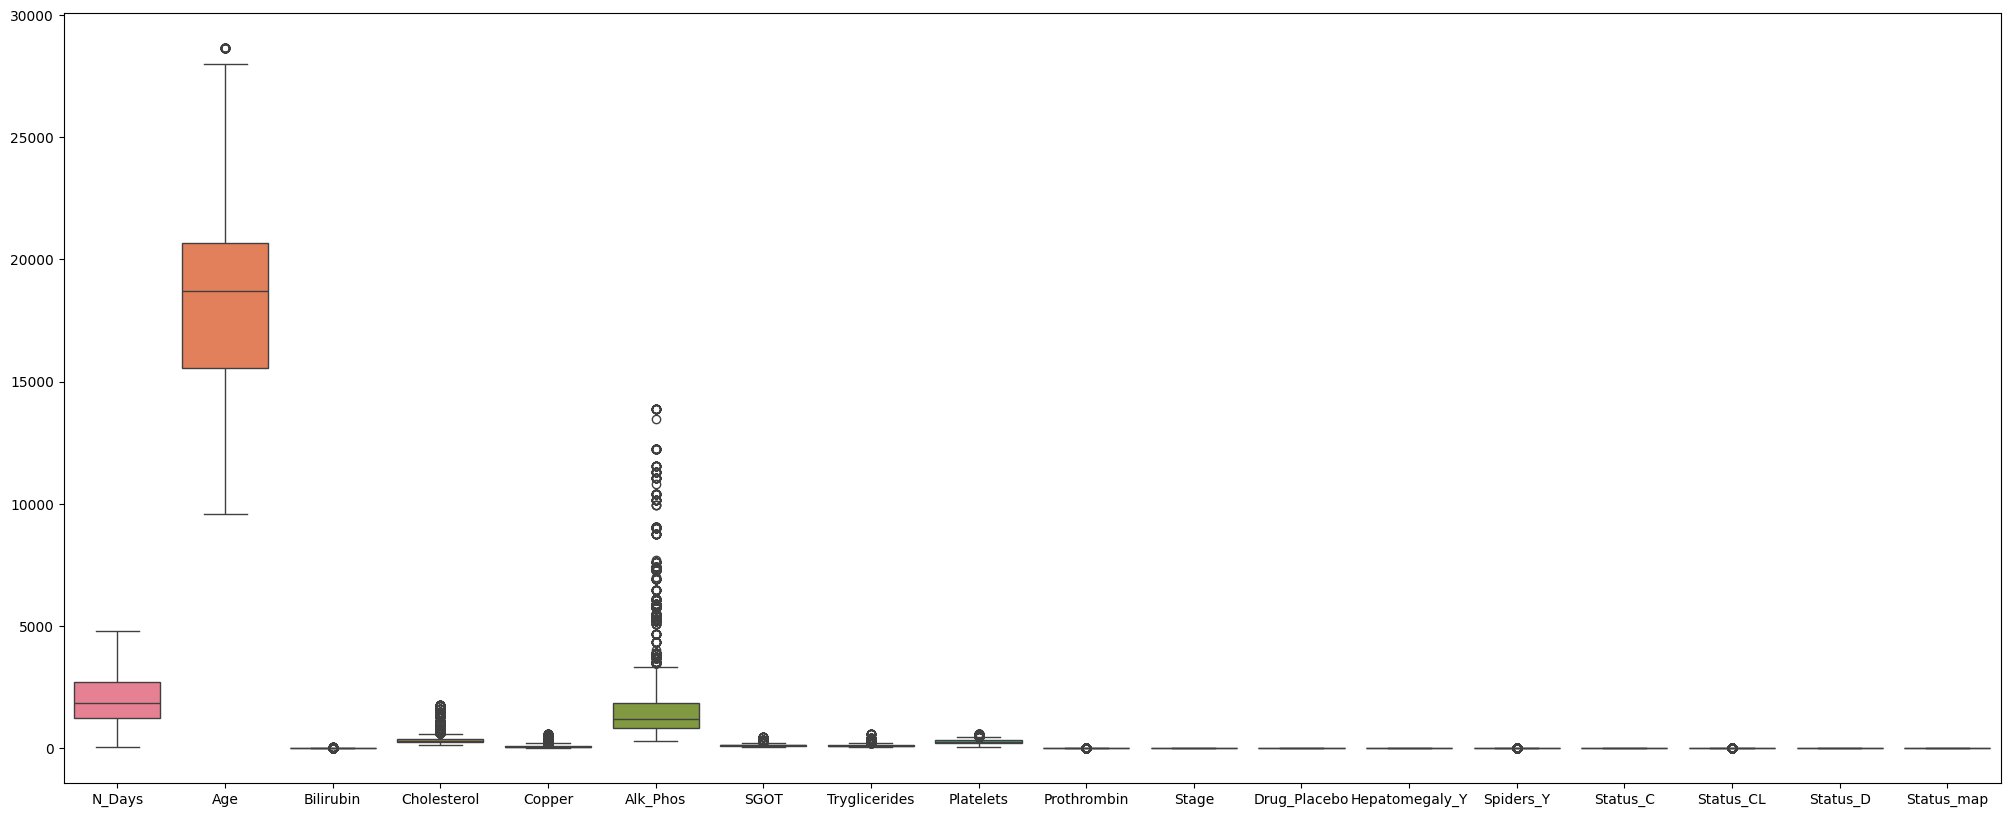

In [35]:
plt.figure(figsize=(25,10))
sns.boxplot(d_train)

In [36]:
d_train.shape

(7905, 18)

# Lets get pipline for our ML models

## ML for Status_C

In [37]:
### set X and Y
data_x = d_train.drop(columns = ['Status_C', 'Status_CL', 'Status_D', 'Status_map'])
data_y_C = d_train['Status_C']

In [38]:
data_x.shape

(7905, 14)

In [39]:
x_train_C, x_test_C, y_train_C, y_test_C = train_test_split(data_x, data_y_C, test_size=0.25, random_state=17)

In [40]:
x_train_C = x_train_C.reset_index(drop=True)
x_test_C = x_test_C.reset_index(drop=True)
y_train_C = y_train_C.reset_index(drop=True)
y_test_C = y_test_C.reset_index(drop=True)

In [41]:
y_train_C.value_counts()

Status_C
1    3704
0    2224
Name: count, dtype: int64

In [42]:
y_test_C.value_counts()

Status_C
1    1261
0     716
Name: count, dtype: int64

In [43]:
scaler = StandardScaler()

x_train_C = pd.DataFrame(scaler.fit_transform(x_train_C), columns=x_train_C.columns)
x_test_C = pd.DataFrame(scaler.transform(x_test_C), columns=x_test_C.columns)
d_test = pd.DataFrame(scaler.transform(d_test), columns=d_test.columns)
all_data_x = pd.DataFrame(scaler.transform(data_x), columns=data_x.columns)

In [44]:
### For the future
def split(x,y, size = 0.25):
    """
    """

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=17)
    x_train = x_train.reset_index(drop=True)
    x_test = x_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    Scaler = StandardScaler()
    x_train = pd.DataFrame(Scaler.fit_transform(x_train), columns=x_train.columns)
    x_test = pd.DataFrame(Scaler.transform(x_test), columns=x_test.columns)

    return x_train, x_test, y_train, y_test

In [45]:
pipeline = Pipeline([
    ('model', None)
])

In [46]:
# Define parameter grids for all models
param_grid = [
    #
    {
        
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': list(range(5, 15)),
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },

    { 
        'model': [LogisticRegression(penalty = 'l2', max_iter = 1000)],
        'model__C': list(range(1, 10)),
        'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'model__class_weight': [None, {0: 1, 1: 10}, {0: 1, 1: 5}, {0: 1, 1: 2}]
    },

    { 
        'model': [DecisionTreeClassifier()],
        'model__max_depth': range(1, 11),
        'model__max_features': range(4, 19),
        'model__min_samples_leaf': list(range(1, 5)),
        'model__criterion': ['gini', 'entropy']
    },

    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [10, 50, 100, 250],
        'model__max_features': ['auto', 'sqrt', 'log2'],
        'model__max_depth': range(1, 11),
        'model__min_samples_leaf': list(range(1, 10)),
        'model__criterion': ['gini', 'entropy']
    },   

    { 
        'model': [XGBClassifier()],
        'model__max_depth': list(range(1, 9)),
        'model__booster': ['gbtree', 'gblinear'],
        'model__eta': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9],
        'model__n_estimators':[50, 100, 150, 200, 250]
    }
]

In [47]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose = 0, refit=True, scoring='roc_auc')

In [48]:
grid_search.fit(x_train_C.to_numpy(), y_train_C.to_numpy())

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', None)]),
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                               'brute'],
                          'model__n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                                 14],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [LogisticRegression(max_iter=1000)],
                          'model__C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'model__class_weight...
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...)],
                          'model__booster': ['gbtree', 'gblinear'],
                          'model__eta': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9],
                          'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                          'model__n_estimators': [50, 100, 150, 200, 250]}],
             scoring='roc_auc')

In [49]:
grid_search.best_params_

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'model__booster': 'gbtree',
 'model__eta': 0.2,
 'model__max_depth': 2,
 'model__n_estimators': 250}

In [50]:
gs_best_param_C = grid_search.best_estimator_

In [51]:
def tru_false_matrix(model, x, y):
    #
    if x.shape[0] == x_train_C.shape[0] or x.shape[0] == x_train_C.shape[0]:
        #
        plt.title('Train');
    elif x.shape[0] == x_test_C.shape[0]:
        #
        plt.title('Test');
    else:
        plt.title('Valid');
    sns.heatmap(metrics.confusion_matrix(y, model.predict(x)),
              annot=True, annot_kws={"size": 12}, cmap='Blues', fmt='g'),
    plt.ylabel('True labels'),
    plt.xlabel('Predicted labels'),
  #plt.title(a)
    plt.show()

In [52]:
def roc_cur(model, x_t = x_train_C, y_t = y_train_C, x_ts = x_test_C, y_ts = y_test_C):
    ##

  # train
    lr_probs_tr = model.predict_proba(x_t)
    lr_probs_tr = lr_probs_tr[:, 1]
    fpr_tr, tpr_tr, treshold_tr = roc_curve(y_t, lr_probs_tr)



  # test
    lr_probs_tst = model.predict_proba(x_ts)
    lr_probs_tst = lr_probs_tst[:, 1]
    fpr_tst, tpr_tst, treshold_tst = roc_curve(y_ts, lr_probs_tst)



    plt.figure(figsize=(10, 5))

    plt.plot(fpr_tr, tpr_tr, color='g',
          label='Train_ROC (area = %0.2f)' % auc(fpr_tr, tpr_tr))


    plt.plot(fpr_tst, tpr_tst, color='darkorange',
          label='Test_ROC (area = %0.2f)' % auc(fpr_tst, tpr_tst))


    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title(model)
    plt.show()

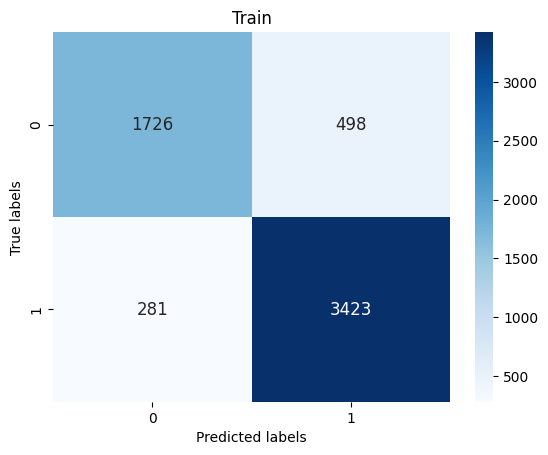

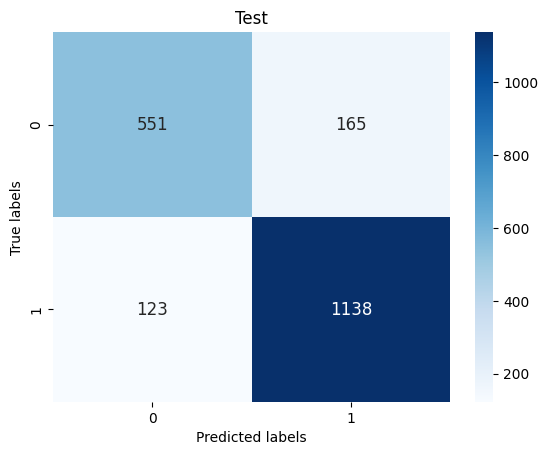

(None, None)

In [53]:
(
    tru_false_matrix(gs_best_param_C, x_train_C.to_numpy(), y_train_C.to_numpy()),

    tru_false_matrix(gs_best_param_C, x_test_C.to_numpy(), y_test_C.to_numpy())
    )

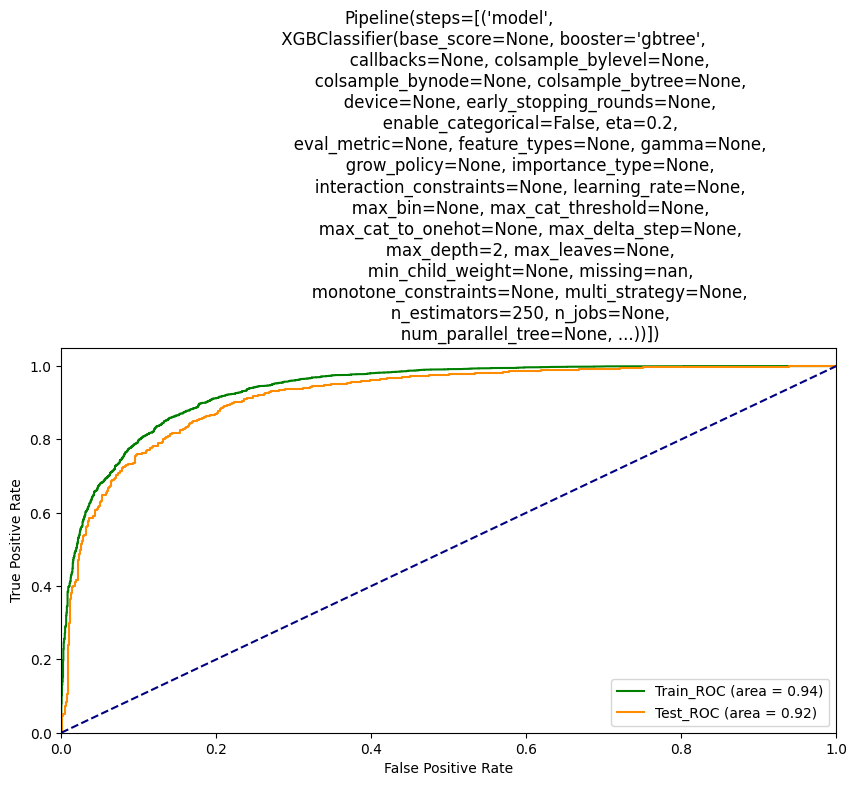

In [54]:
roc_cur(gs_best_param_C,x_t = x_train_C.to_numpy(), y_t = y_train_C.to_numpy(), x_ts = x_test_C.to_numpy(), y_ts = y_test_C.to_numpy())

### Make results_df and metrics_df

In [55]:
results_df_C = pd.DataFrame(grid_search.cv_results_)

In [56]:
results_df_C.head(8)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__algorithm,param_model__n_neighbors,param_model__weights,param_model__C,param_model__class_weight,...,param_model__eta,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005361,0.000379,0.062888,0.001131,KNeighborsClassifier(),auto,5,uniform,NaN,NaN,...,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.827464,0.828997,0.824061,0.845597,0.828806,0.830985,0.007517,2860
1,0.004137,0.000177,0.063070,0.000300,KNeighborsClassifier(),auto,5,distance,NaN,NaN,...,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.828438,0.831199,0.825371,0.847649,0.834140,0.833359,0.007714,2833
2,0.004414,0.000736,0.065226,0.000135,KNeighborsClassifier(),auto,6,uniform,NaN,NaN,...,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.832912,0.834251,0.830451,0.850870,0.831481,0.835993,0.007549,2793
3,0.004050,0.000242,0.064719,0.000412,KNeighborsClassifier(),auto,6,distance,NaN,NaN,...,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.833823,0.837570,0.830892,0.852859,0.836332,0.838295,0.007633,2765
4,0.004201,0.000279,0.067908,0.002642,KNeighborsClassifier(),auto,7,uniform,NaN,NaN,...,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.838754,0.832783,0.838275,0.856025,0.836311,0.840430,0.008076,2733
5,0.004571,0.000750,0.067449,0.001940,KNeighborsClassifier(),auto,7,distance,NaN,NaN,...,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.839563,0.836648,0.837027,0.859122,0.840806,0.842633,0.008389,2701
6,0.004055,0.000405,0.066169,0.002430,KNeighborsClassifier(),auto,8,uniform,NaN,NaN,...,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.839691,0.833929,0.843235,0.859539,0.847578,0.844794,0.008622,2668
7,0.004105,0.000485,0.065123,0.001757,KNeighborsClassifier(),auto,8,distance,NaN,NaN,...,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.841715,0.838619,0.841454,0.863088,0.850468,0.847069,0.008942,2621


In [57]:
def some_fun(df):
    
    aaa = []
    for x in list(df['param_model'].unique()):
        
        for e in df[df['mean_test_score'] == df[df['param_model'] == x]['mean_test_score'].max()]. index:
            
            aaa.append(e)
            
    metrics_df = df.loc[aaa]
    metrics_df = metrics_df.sort_values(by='mean_test_score', ascending=False)
    metrics_df = metrics_df.reset_index(drop=True)
    return metrics_df

In [58]:
metrics_df_C = some_fun(results_df_C)

In [59]:
metrics_df_C

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__algorithm,param_model__n_neighbors,param_model__weights,param_model__C,param_model__class_weight,...,param_model__eta,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.063743,0.002064,0.003372,0.000307,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,NaN,NaN,...,0.2,"{'model': XGBClassifier(base_score=None, boost...",0.908517,0.895637,0.892260,0.901633,0.897802,0.899170,0.005577,1
1,1.007009,0.004822,0.027810,0.000551,RandomForestClassifier(),NaN,NaN,NaN,NaN,NaN,...,NaN,"{'model': RandomForestClassifier(), 'model__cr...",0.901668,0.894308,0.892274,0.903301,0.902914,0.898893,0.004651,2
2,0.016741,0.001123,0.002392,0.000552,LogisticRegression(max_iter=1000),NaN,NaN,NaN,8,None,...,NaN,"{'model': LogisticRegression(max_iter=1000), '...",0.868010,0.858059,0.870268,0.870729,0.870947,0.867603,0.004885,1846
3,0.006864,0.000186,0.001200,0.000218,DecisionTreeClassifier(),NaN,NaN,NaN,NaN,NaN,...,NaN,"{'model': DecisionTreeClassifier(), 'model__cr...",0.873597,0.857318,0.859882,0.867074,0.869703,0.865515,0.006070,1956
4,0.004097,0.000372,0.072892,0.002391,KNeighborsClassifier(),auto,14,distance,NaN,NaN,...,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.857482,0.845686,0.856243,0.868968,0.861217,0.857919,0.007558,2286
5,0.002935,0.000315,0.054386,0.000377,KNeighborsClassifier(),ball_tree,14,distance,NaN,NaN,...,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.857482,0.845686,0.856243,0.868968,0.861217,0.857919,0.007558,2286
6,0.003957,0.000319,0.070709,0.001106,KNeighborsClassifier(),kd_tree,14,distance,NaN,NaN,...,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.857482,0.845686,0.856243,0.868968,0.861217,0.857919,0.007558,2286


In [60]:
### All our best models and params for C
model_list_C = []

for i in metrics_df_C['param_model'].unique():
    model_list_C.append(i)

In [61]:
### import joblib

###joblib.dump(metrics_df, 'metrics_df.pkl')
###joblib.dump(model_list, 'model_list.pkl')
###joblib.dump(gs_rfc_best_param, 'Best_ML_model_For_C.pkl')

### Bagging

In [62]:
bc_ = BaggingClassifier( random_state=17 )

In [63]:
param_grid_bc = {
    'estimator': [model_list_C[0], model_list_C[1]],
    'n_estimators': [10, 25, 50],
    'max_samples': [0.4, 0.6, 0.8, 0.9],
    'max_features': [0.4, 0.6, 0.8, 0.9]

}

In [64]:
gs_bc = GridSearchCV(bc_, param_grid_bc, cv=5, verbose = 0, refit=True, scoring='roc_auc')

In [65]:
gs_bc.fit(x_train_C.to_numpy(), y_train_C.to_numpy())

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=17),
             param_grid={'estimator': [XGBClassifier(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importanc...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...),
                                       RandomForestClassifier()],
                         'max_features': [0.4, 0.6, 0.8, 0.9],
                         'max_samples': [0.4, 0.6, 0.8, 0.9],
                         'n_estimators': [10, 25, 50]},
             scoring='roc_auc')

In [66]:
gs_bc.best_params_

{'estimator': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'max_features': 0.6,
 'max_samples': 0.9,
 'n_estimators': 50}

In [67]:
bc_best_param_C = gs_bc.best_estimator_

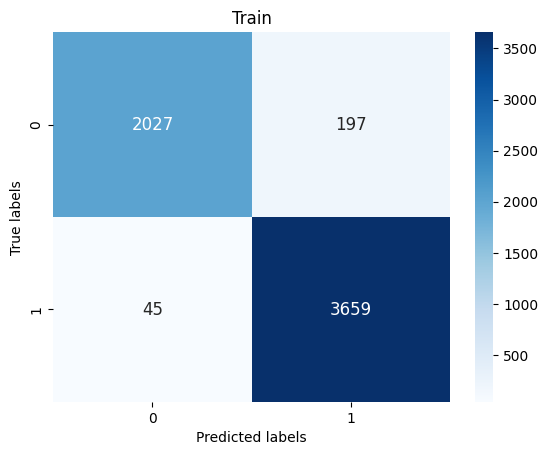

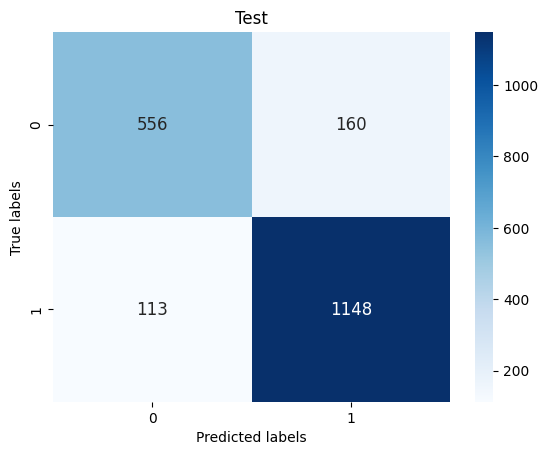

(None, None)

In [68]:
(
    tru_false_matrix(bc_best_param_C, x_train_C.to_numpy(), y_train_C.to_numpy()),
    
    tru_false_matrix(bc_best_param_C, x_test_C.to_numpy(), y_test_C.to_numpy())
    )

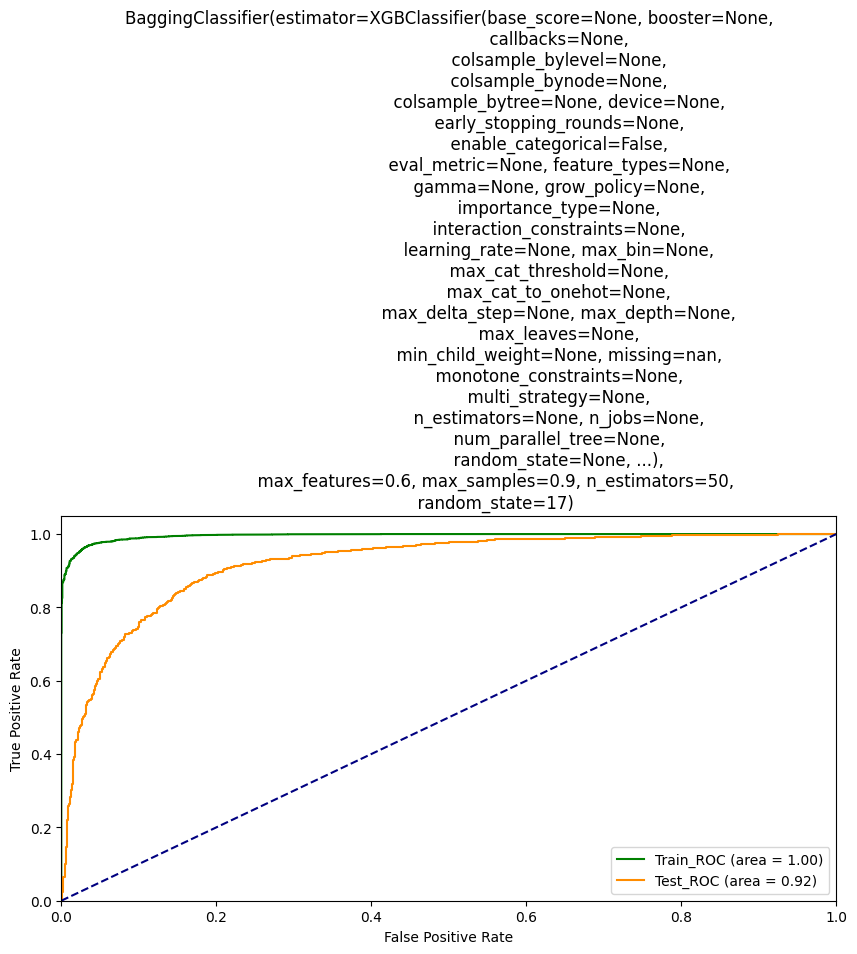

In [69]:
roc_cur(bc_best_param_C,x_t = x_train_C.to_numpy(), y_t = y_train_C.to_numpy(), x_ts = x_test_C.to_numpy(), y_ts = y_test_C.to_numpy())

In [70]:
###joblib.dump(bc_best_param, 'bc_best_param.pkl')


### Voting

In [71]:
model_list_C

[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 RandomForestClassifier(),
 LogisticRegression(max_iter=1000),
 DecisionTreeClassifier(),
 KNeighborsClassifier()]

In [72]:
classifiers_names = ['xgb', 'rf', 'log_reg', 'dec_tree']
classifiers = list(model_list_C[:4])
vc_ = VotingClassifier( estimators = list(zip(classifiers_names, classifiers)), voting='soft')

In [73]:
param_grid_vr_ = {
    


}

In [74]:
gs_vc = GridSearchCV(vc_, param_grid_vr_, cv=5, verbose = 0, refit=True, scoring='roc_auc')

In [75]:
gs_vc.fit(x_train_C.to_numpy(), y_train_C.to_numpy())

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('xgb',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_types=None,
                                                                   gamma=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_...
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...)),
                                                    ('rf',
                                                     RandomForestClassifier()),
                                                    ('log_reg',
                                                     LogisticRegression(max_iter=1000)),
                                                    ('dec_tree',
                                                     DecisionTreeClassifier())],
                                        voting='soft'),
             param_grid={}, scoring='roc_auc')

In [76]:
vc_best_param_C = gs_vc.best_estimator_

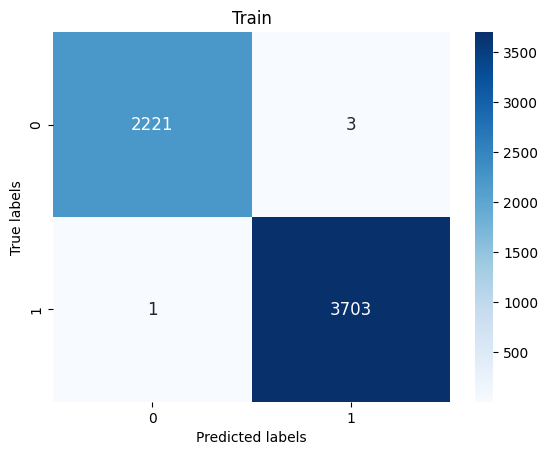

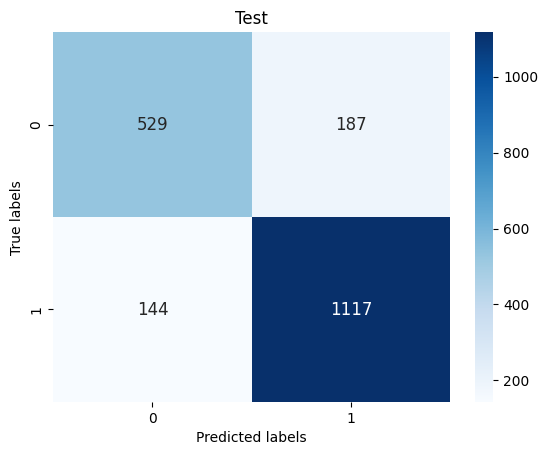

(None, None)

In [77]:
(
    tru_false_matrix(vc_best_param_C, x_train_C.to_numpy(), y_train_C.to_numpy()),
    
    tru_false_matrix(vc_best_param_C, x_test_C.to_numpy(), y_test_C.to_numpy())
    )

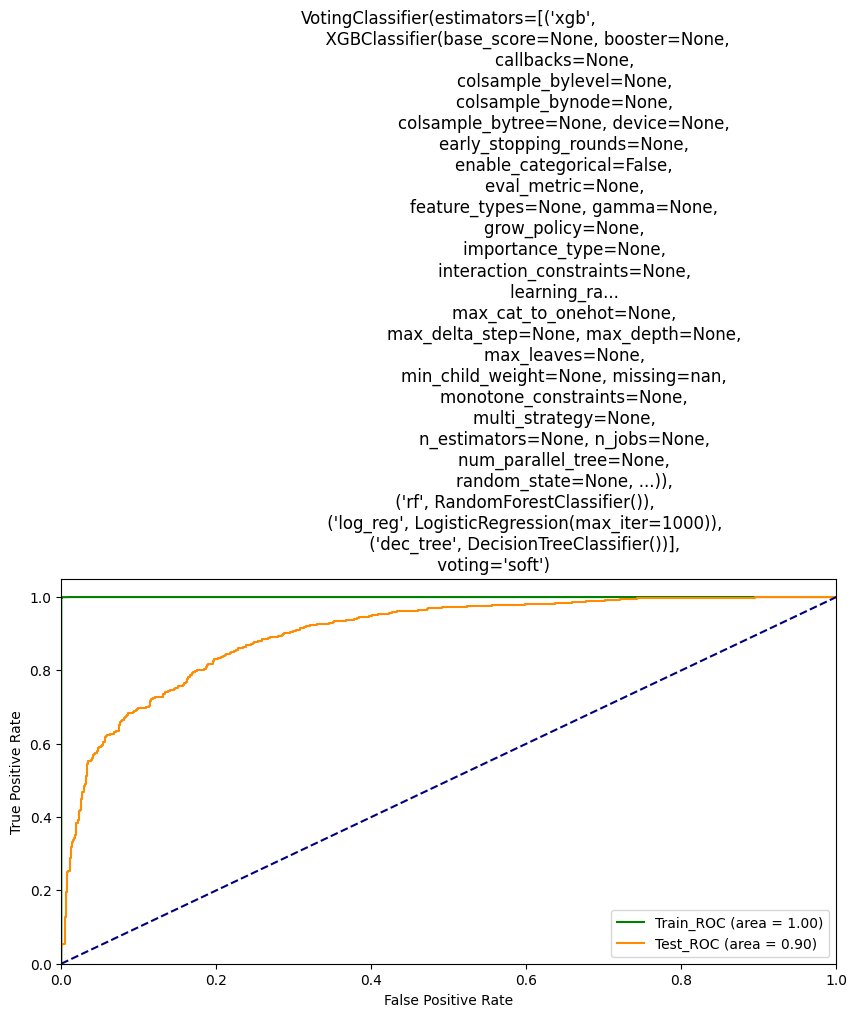

In [78]:
roc_cur(vc_best_param_C,x_t = x_train_C.to_numpy(), y_t = y_train_C.to_numpy(), x_ts = x_test_C.to_numpy(), y_ts = y_test_C.to_numpy())

conclusion - the first model was the best, let's add the values of its predict_priba for the first class to the variable with the final answer

### sample_submission

In [79]:
sample_submission = pd.DataFrame(data_test['id'])

In [80]:
sample_submission['pr_C'] = pd.DataFrame(gs_best_param_C.predict_proba(d_test.to_numpy()))[1]

# ML for Status_CL


In [81]:
### set X and Y
x_train_CL, x_test_CL, y_train_CL, y_test_CL = split(x=data_x, y=d_train['Status_CL'])

In [82]:
y_train_CL.value_counts()

Status_CL
0    5713
1     215
Name: count, dtype: int64

In [83]:
y_test_CL.value_counts()

Status_CL
0    1917
1      60
Name: count, dtype: int64

In [84]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose = 0, refit=True, scoring='roc_auc')

In [85]:
grid_search.fit(x_train_CL.to_numpy(), y_train_CL.to_numpy())

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', None)]),
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                               'brute'],
                          'model__n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                                 14],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [LogisticRegression(max_iter=1000)],
                          'model__C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'model__class_weight...
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...)],
                          'model__booster': ['gbtree', 'gblinear'],
                          'model__eta': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9],
                          'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                          'model__n_estimators': [50, 100, 150, 200, 250]}],
             scoring='roc_auc')

In [86]:
grid_search.best_params_

{'model': RandomForestClassifier(),
 'model__criterion': 'entropy',
 'model__max_depth': 9,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 4,
 'model__n_estimators': 100}

In [87]:
gs_best_param_CL = grid_search.best_estimator_

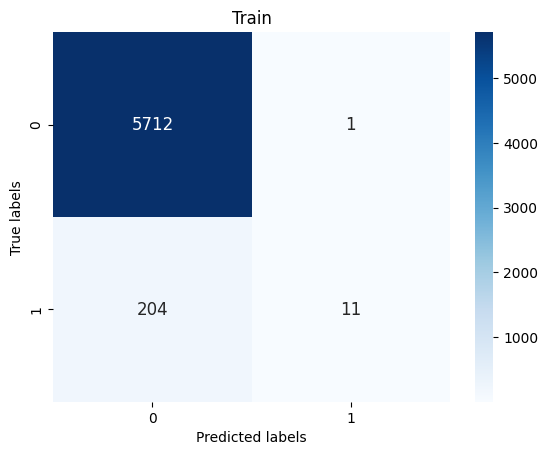

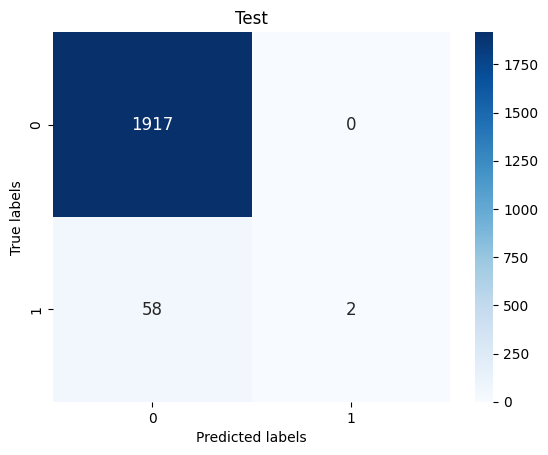

(None, None)

In [88]:
(
    tru_false_matrix(gs_best_param_CL, x_train_CL.to_numpy(), y_train_CL.to_numpy()),

    tru_false_matrix(gs_best_param_CL, x_test_CL.to_numpy(), y_test_CL.to_numpy())
    )

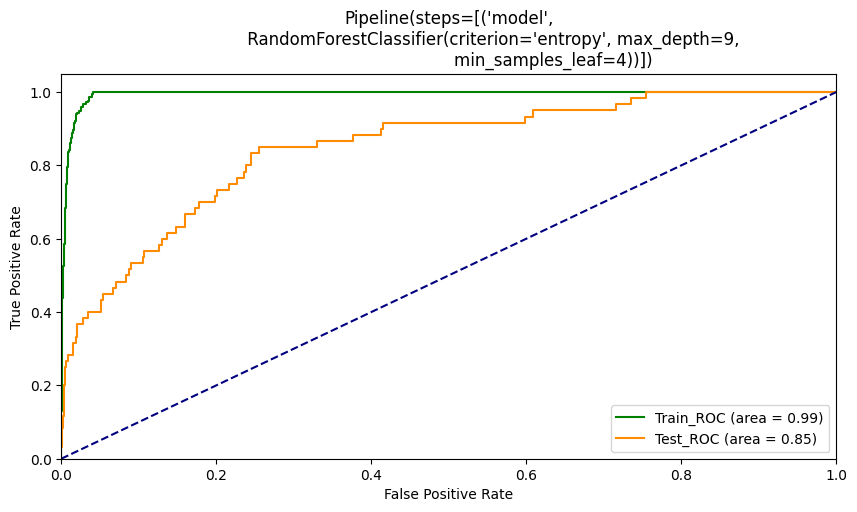

In [89]:
roc_cur(gs_best_param_CL,x_t = x_train_CL.to_numpy(), y_t = y_train_CL.to_numpy(), x_ts = x_test_CL.to_numpy(), y_ts = y_test_CL.to_numpy())

## results_df2 and metrics_df2

In [90]:
results_df_CL = pd.DataFrame(grid_search.cv_results_)

In [91]:
metrics_df_CL = some_fun(results_df_CL)

In [92]:
metrics_df_CL

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__algorithm,param_model__n_neighbors,param_model__weights,param_model__C,param_model__class_weight,...,param_model__eta,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.277659,0.002530,0.009807,0.000323,RandomForestClassifier(),NaN,NaN,NaN,NaN,NaN,...,NaN,"{'model': RandomForestClassifier(), 'model__cr...",0.838349,0.830714,0.824564,0.863853,0.858935,0.843283,0.015497,1
1,0.050726,0.002616,0.003496,0.000468,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,NaN,NaN,...,0.6,"{'model': XGBClassifier(base_score=None, boost...",0.811232,0.786561,0.804658,0.871292,0.862562,0.827261,0.033494,235
2,0.005005,0.000176,0.001023,0.000039,DecisionTreeClassifier(),NaN,NaN,NaN,NaN,NaN,...,NaN,"{'model': DecisionTreeClassifier(), 'model__cr...",0.744756,0.771146,0.741972,0.786385,0.806828,0.770217,0.024693,1578
3,0.006858,0.000497,0.001869,0.000361,LogisticRegression(max_iter=1000),NaN,NaN,NaN,1,"{0: 1, 1: 10}",...,NaN,"{'model': LogisticRegression(max_iter=1000), '...",0.733200,0.698043,0.697055,0.760618,0.740998,0.725983,0.024878,1965
4,0.003977,0.000527,0.073687,0.001132,KNeighborsClassifier(),auto,14,distance,NaN,NaN,...,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.712605,0.689152,0.683824,0.737169,0.690947,0.702739,0.019820,2645
5,0.002626,0.000217,0.054392,0.000380,KNeighborsClassifier(),ball_tree,14,distance,NaN,NaN,...,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.712605,0.689152,0.683824,0.737169,0.690947,0.702739,0.019820,2645
6,0.003555,0.000111,0.070703,0.000383,KNeighborsClassifier(),kd_tree,14,distance,NaN,NaN,...,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.712605,0.689152,0.683824,0.737169,0.690947,0.702739,0.019820,2645
7,0.000676,0.000134,0.009566,0.000131,KNeighborsClassifier(),brute,14,distance,NaN,NaN,...,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.712605,0.689152,0.683824,0.737169,0.690947,0.702739,0.019820,2645


In [93]:
### All our best models and params for C
model_list_CL = []

for i in metrics_df_CL['param_model'].unique():
    model_list_CL.append(i)

### Bagging

In [94]:
param_grid_bc = {
    'estimator': [model_list_CL[0], model_list_CL[1]],
    'n_estimators': [10, 25, 50],
    'max_samples': [0.4, 0.6, 0.8, 0.9],
    'max_features': [0.4, 0.6, 0.8, 0.9]

}

In [95]:
gs_bc.fit(x_train_CL.to_numpy(), y_train_CL.to_numpy())

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=17),
             param_grid={'estimator': [XGBClassifier(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importanc...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...),
                                       RandomForestClassifier()],
                         'max_features': [0.4, 0.6, 0.8, 0.9],
                         'max_samples': [0.4, 0.6, 0.8, 0.9],
                         'n_estimators': [10, 25, 50]},
             scoring='roc_auc')

In [96]:
gs_bc.best_params_

{'estimator': RandomForestClassifier(),
 'max_features': 0.4,
 'max_samples': 0.8,
 'n_estimators': 50}

In [97]:
bc_best_param_CL = gs_bc.best_estimator_

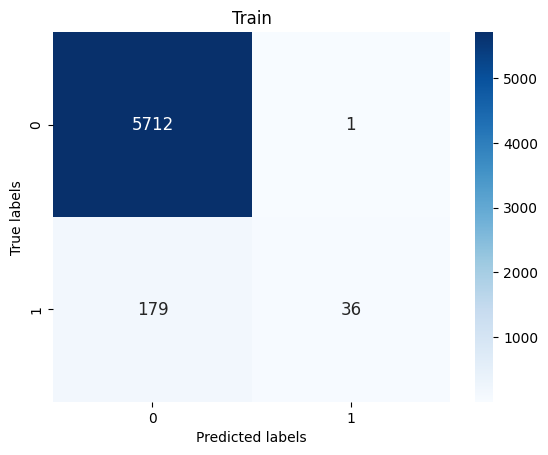

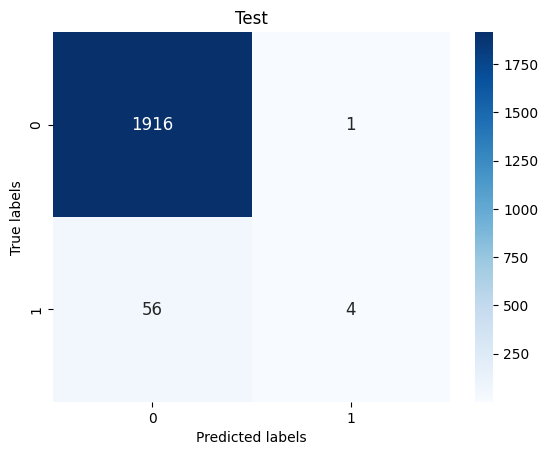

(None, None)

In [98]:
(
    tru_false_matrix(bc_best_param_CL, x_train_CL.to_numpy(), y_train_CL.to_numpy()),
    
    tru_false_matrix(bc_best_param_CL, x_test_CL.to_numpy(), y_test_CL.to_numpy())
    )

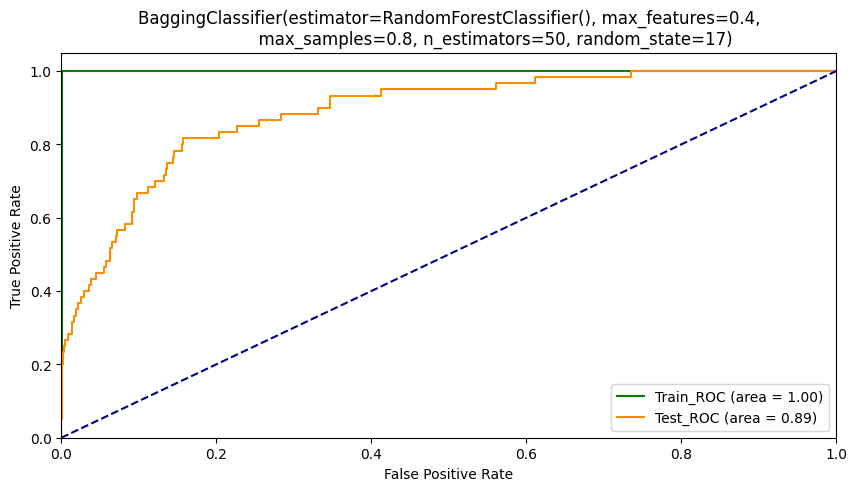

In [99]:
roc_cur(bc_best_param_CL,x_t = x_train_CL.to_numpy(), y_t = y_train_CL.to_numpy(), x_ts = x_test_CL.to_numpy(), y_ts = y_test_CL.to_numpy())

In [100]:
### Voting

In [101]:
model_list_CL

[RandomForestClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 DecisionTreeClassifier(),
 LogisticRegression(max_iter=1000),
 KNeighborsClassifier()]

In [102]:
classifiers_names = ['rf', 'xgb', 'dec_tree', 'log_reg']
classifiers = list(model_list_CL[:4])


In [103]:
gs_vc.fit(x_train_CL.to_numpy(), y_train_CL.to_numpy())

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('xgb',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_types=None,
                                                                   gamma=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_...
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...)),
                                                    ('rf',
                                                     RandomForestClassifier()),
                                                    ('log_reg',
                                                     LogisticRegression(max_iter=1000)),
                                                    ('dec_tree',
                                                     DecisionTreeClassifier())],
                                        voting='soft'),
             param_grid={}, scoring='roc_auc')

In [104]:
vc_best_param_CL = gs_vc.best_estimator_

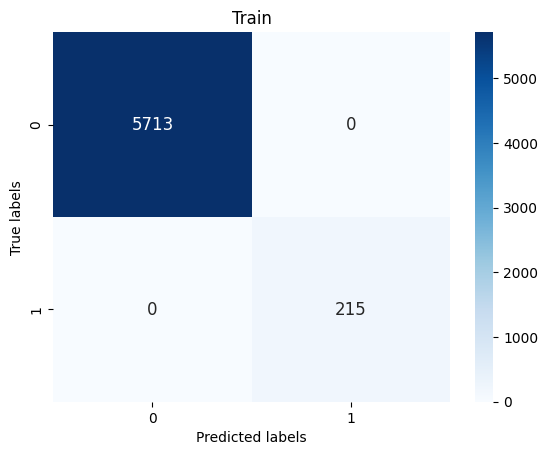

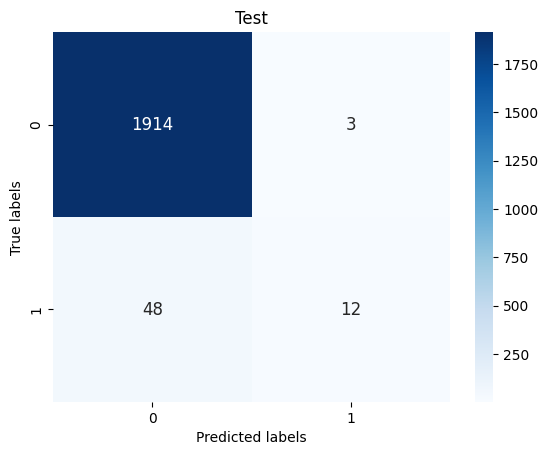

(None, None)

In [105]:
(
    tru_false_matrix(vc_best_param_CL, x_train_CL.to_numpy(), y_train_CL.to_numpy()),
    
    tru_false_matrix(vc_best_param_CL, x_test_CL.to_numpy(), y_test_CL.to_numpy())
    )

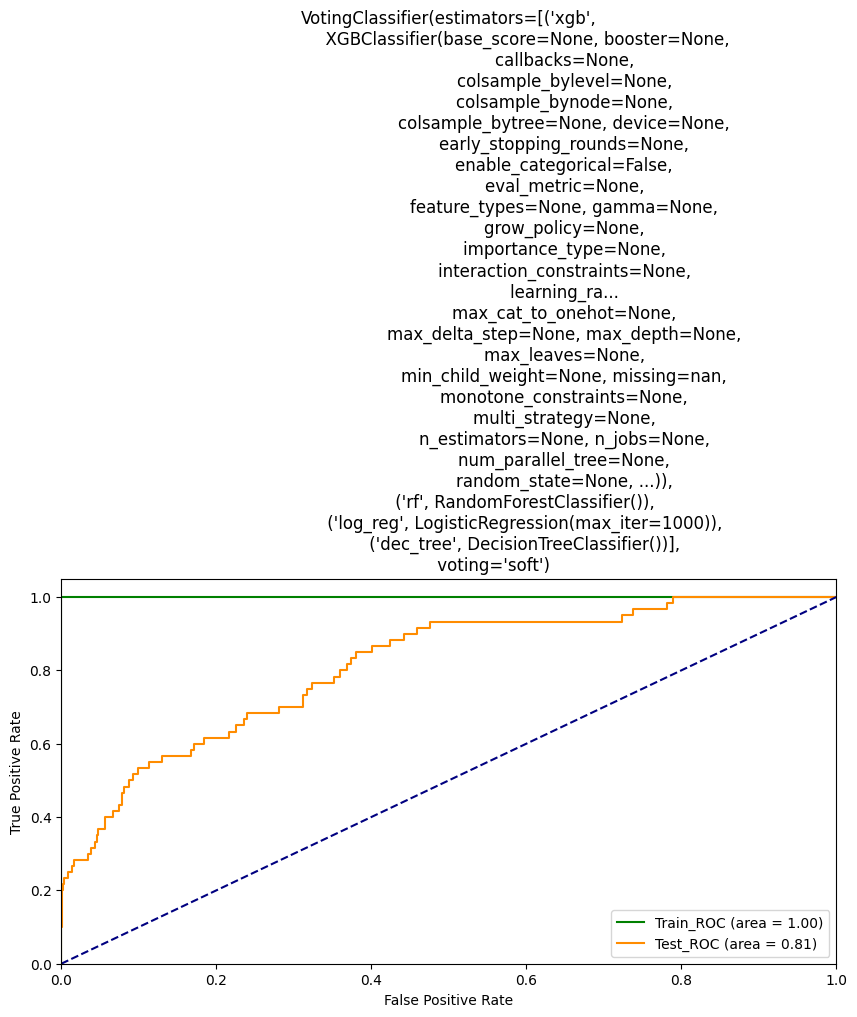

In [106]:
roc_cur(vc_best_param_CL,x_t = x_train_CL.to_numpy(), y_t = y_train_CL.to_numpy(), x_ts = x_test_CL.to_numpy(), y_ts = y_test_CL.to_numpy())

### As we can see, there is a very small sample for this class and, as a result, it is poorly balanced, so as a possible solution, I suggest trying to train several more models, but using cross-validation on the full sample

In [107]:
grid_search.fit(all_data_x.to_numpy(), d_train['Status_CL'].to_numpy())

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', None)]),
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                               'brute'],
                          'model__n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                                 14],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [LogisticRegression(max_iter=1000)],
                          'model__C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'model__class_weight...
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...)],
                          'model__booster': ['gbtree', 'gblinear'],
                          'model__eta': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9],
                          'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                          'model__n_estimators': [50, 100, 150, 200, 250]}],
             scoring='roc_auc')

In [108]:
grid_search.best_params_

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'model__booster': 'gbtree',
 'model__eta': 0.6,
 'model__max_depth': 1,
 'model__n_estimators': 250}

In [109]:
gs_best_param_CL_2 = grid_search.best_estimator_

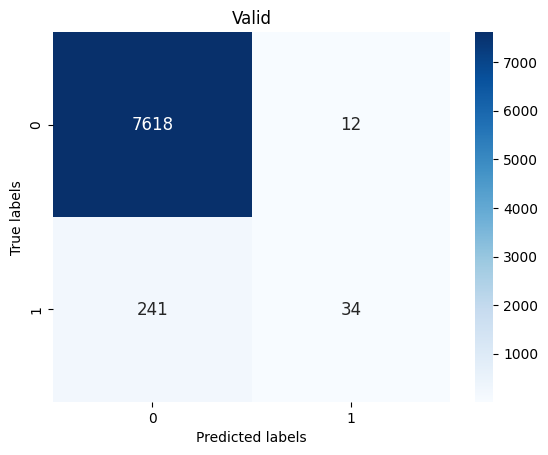

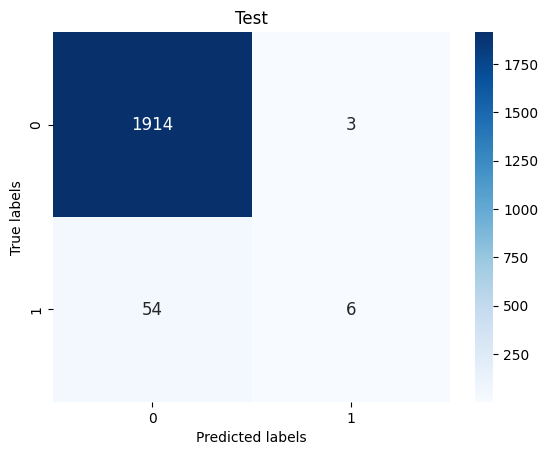

(None, None)

In [110]:
(
    tru_false_matrix(gs_best_param_CL_2, all_data_x.to_numpy(), d_train['Status_CL'].to_numpy()),

    tru_false_matrix(gs_best_param_CL_2, x_test_CL.to_numpy(), y_test_CL.to_numpy())
    )

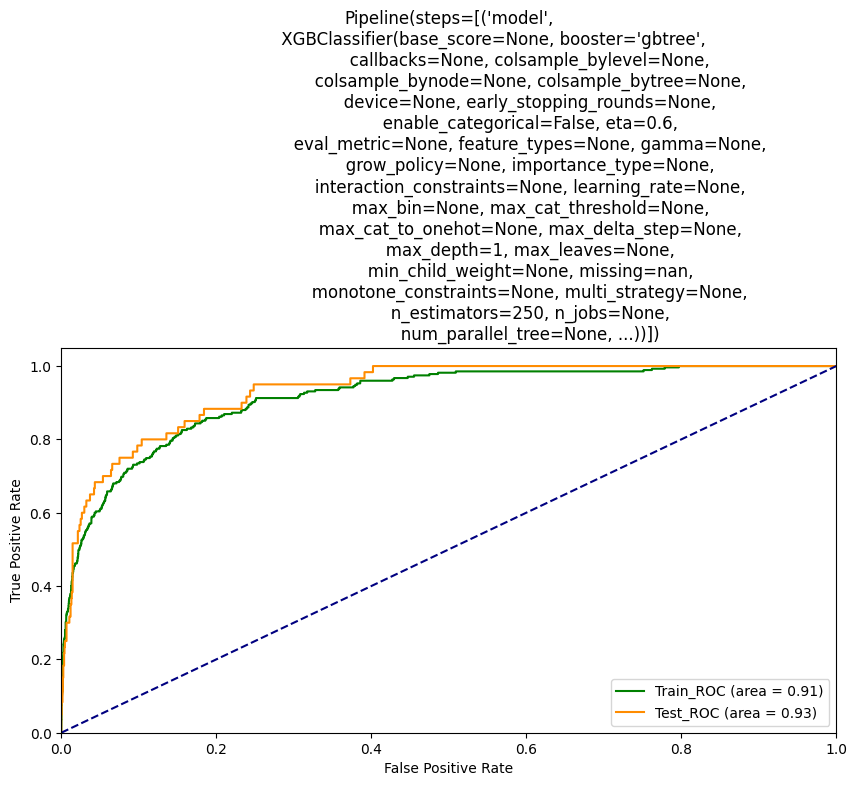

In [111]:
roc_cur(gs_best_param_CL_2,x_t = all_data_x.to_numpy(), y_t = d_train['Status_CL'].to_numpy(), x_ts = x_test_CL.to_numpy(), y_ts = y_test_CL.to_numpy())


In [112]:
results_df_CL_2 = pd.DataFrame(grid_search.cv_results_)

In [113]:
metrics_df_CL_2 = some_fun(results_df_CL_2)

In [114]:
### All our best models and params for C
model_list_CL_2 = []

for i in metrics_df_CL_2['param_model'].unique():
    model_list_CL_2.append(i)

In [115]:
model_list_CL_2

[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 RandomForestClassifier(),
 DecisionTreeClassifier(),
 LogisticRegression(max_iter=1000),
 KNeighborsClassifier()]

In [116]:
classifiers_names = ['xgb', 'rf', 'dec_tree', 'log_reg']
classifiers = list(model_list_CL_2[:4])


In [117]:
gs_vc.fit(all_data_x.to_numpy(), d_train['Status_CL'].to_numpy())

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('xgb',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_types=None,
                                                                   gamma=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_...
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...)),
                                                    ('rf',
                                                     RandomForestClassifier()),
                                                    ('log_reg',
                                                     LogisticRegression(max_iter=1000)),
                                                    ('dec_tree',
                                                     DecisionTreeClassifier())],
                                        voting='soft'),
             param_grid={}, scoring='roc_auc')

In [118]:
vc_best_param_CL_2 = gs_vc.best_estimator_

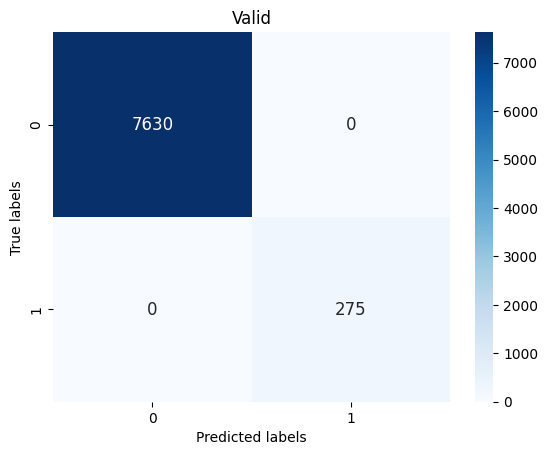

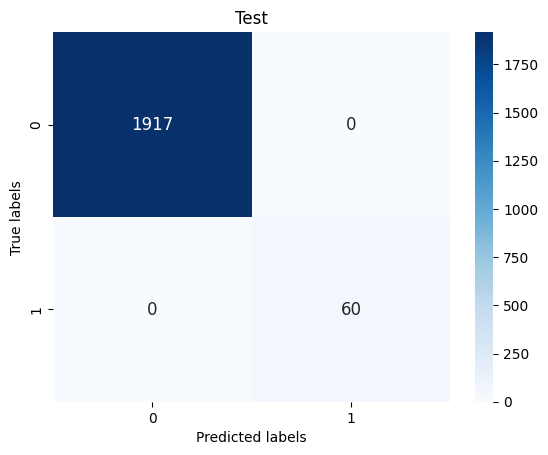

(None, None)

In [119]:
(
    tru_false_matrix(vc_best_param_CL_2, all_data_x.to_numpy(), d_train['Status_CL'].to_numpy()),
    
    tru_false_matrix(vc_best_param_CL_2, x_test_CL.to_numpy(), y_test_CL.to_numpy())
    )

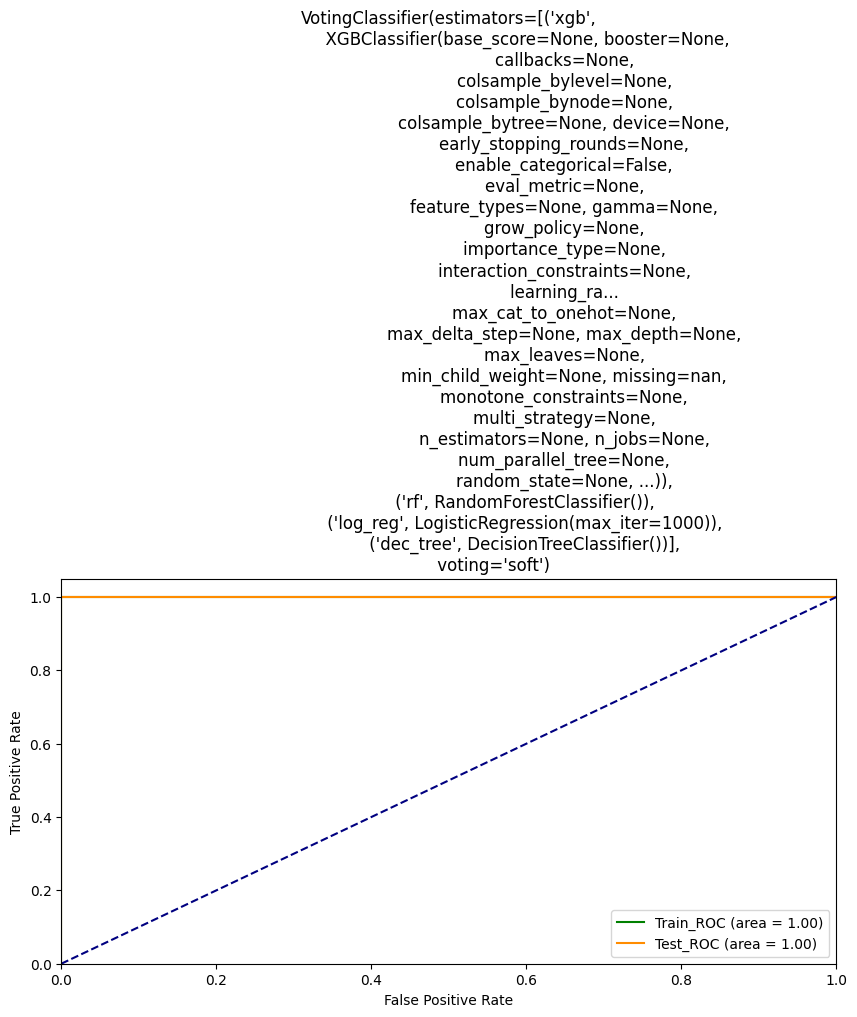

In [120]:
roc_cur(vc_best_param_CL_2,x_t = all_data_x.to_numpy(), y_t = d_train['Status_CL'].to_numpy(), x_ts = x_test_CL.to_numpy(), y_ts = y_test_CL.to_numpy())


As a result, we got a very overtrained model, we’ll see in the final results whether it’s good or not, but for now we’ll take it as the main one for this class


In [121]:
sample_submission['pr_CL'] = pd.DataFrame(vc_best_param_CL_2.predict_proba(d_test.to_numpy()))[1]

### ML for Status_D

In [122]:
x_train_D, x_test_D, y_train_D, y_test_D = split(x=data_x, y=d_train['Status_D'])

In [123]:
y_train_D.value_counts()

Status_D
0    3919
1    2009
Name: count, dtype: int64

In [124]:
y_test_D.value_counts()

Status_D
0    1321
1     656
Name: count, dtype: int64

In [125]:
grid_search.fit(x_train_D.to_numpy(), y_train_D.to_numpy())

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', None)]),
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                               'brute'],
                          'model__n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                                 14],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [LogisticRegression(max_iter=1000)],
                          'model__C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'model__class_weight...
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...)],
                          'model__booster': ['gbtree', 'gblinear'],
                          'model__eta': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9],
                          'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                          'model__n_estimators': [50, 100, 150, 200, 250]}],
             scoring='roc_auc')

In [126]:
gs_best_param_D = grid_search.best_estimator_

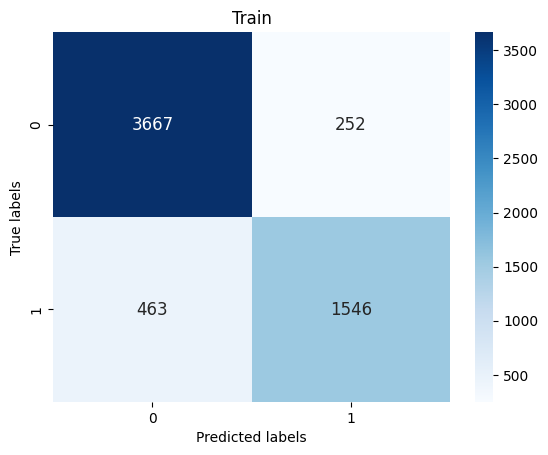

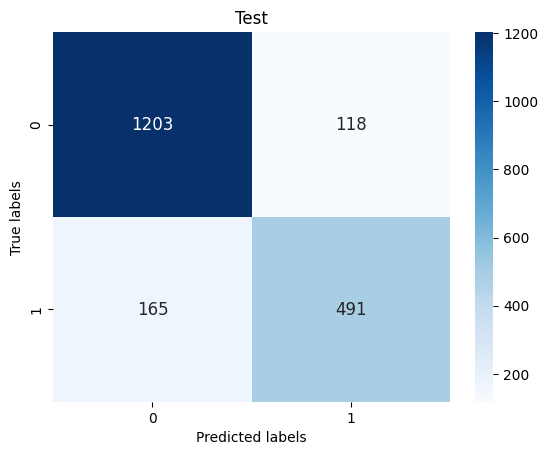

(None, None)

In [127]:
(
    tru_false_matrix(gs_best_param_D, x_train_D.to_numpy(), y_train_D.to_numpy()),

    tru_false_matrix(gs_best_param_D, x_test_D.to_numpy(), y_test_D.to_numpy())
    )

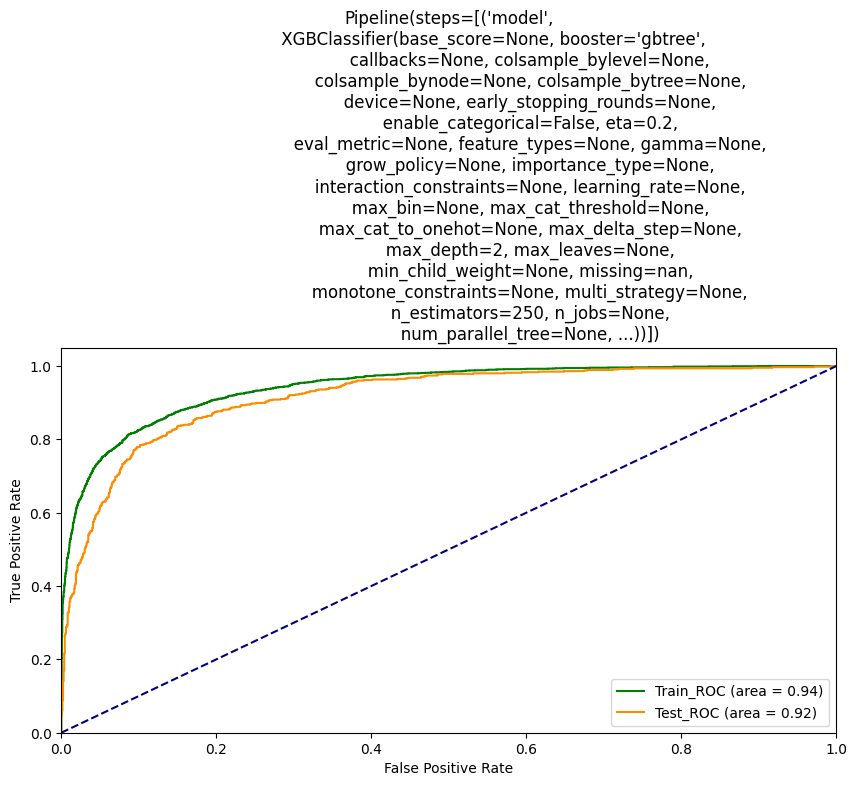

In [128]:
roc_cur(gs_best_param_D,x_t = x_train_D.to_numpy(), y_t = y_train_D.to_numpy(), x_ts = x_test_D.to_numpy(), y_ts = y_test_D.to_numpy())


In [129]:
results_df_D = pd.DataFrame(grid_search.cv_results_)

In [130]:
metrics_df_D = some_fun(results_df_D)

In [131]:
### All our best models and params for C
model_list_D = []

for i in metrics_df_D['param_model'].unique():
    model_list_D.append(i)

In [132]:
model_list_D

[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 RandomForestClassifier(),
 LogisticRegression(max_iter=1000),
 DecisionTreeClassifier(),
 KNeighborsClassifier()]

In [133]:
### Bagging for D

In [134]:
param_grid_bc = {
    'estimator': [model_list_D[0], model_list_D[1]],
    'n_estimators': [10, 25, 50],
    'max_samples': [0.4, 0.6, 0.8, 0.9],
    'max_features': [0.4, 0.6, 0.8, 0.9]

}

In [135]:
gs_bc.fit(x_train_D.to_numpy(), y_train_D.to_numpy())

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=17),
             param_grid={'estimator': [XGBClassifier(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importanc...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...),
                                       RandomForestClassifier()],
                         'max_features': [0.4, 0.6, 0.8, 0.9],
                         'max_samples': [0.4, 0.6, 0.8, 0.9],
                         'n_estimators': [10, 25, 50]},
             scoring='roc_auc')

In [136]:
gs_bc.best_params_

{'estimator': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'max_features': 0.6,
 'max_samples': 0.9,
 'n_estimators': 50}

In [137]:
bc_best_param_D = gs_bc.best_estimator_

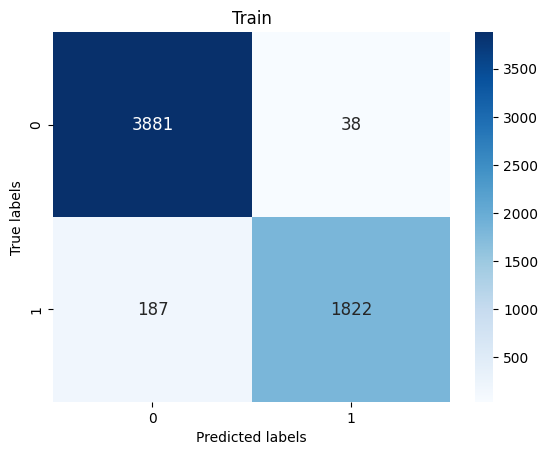

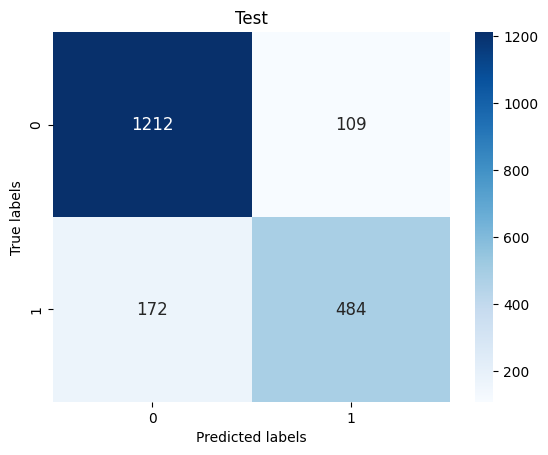

(None, None)

In [138]:
(
    tru_false_matrix(bc_best_param_D, x_train_D.to_numpy(), y_train_D.to_numpy()),
    
    tru_false_matrix(bc_best_param_D, x_test_D.to_numpy(), y_test_D.to_numpy())
    )

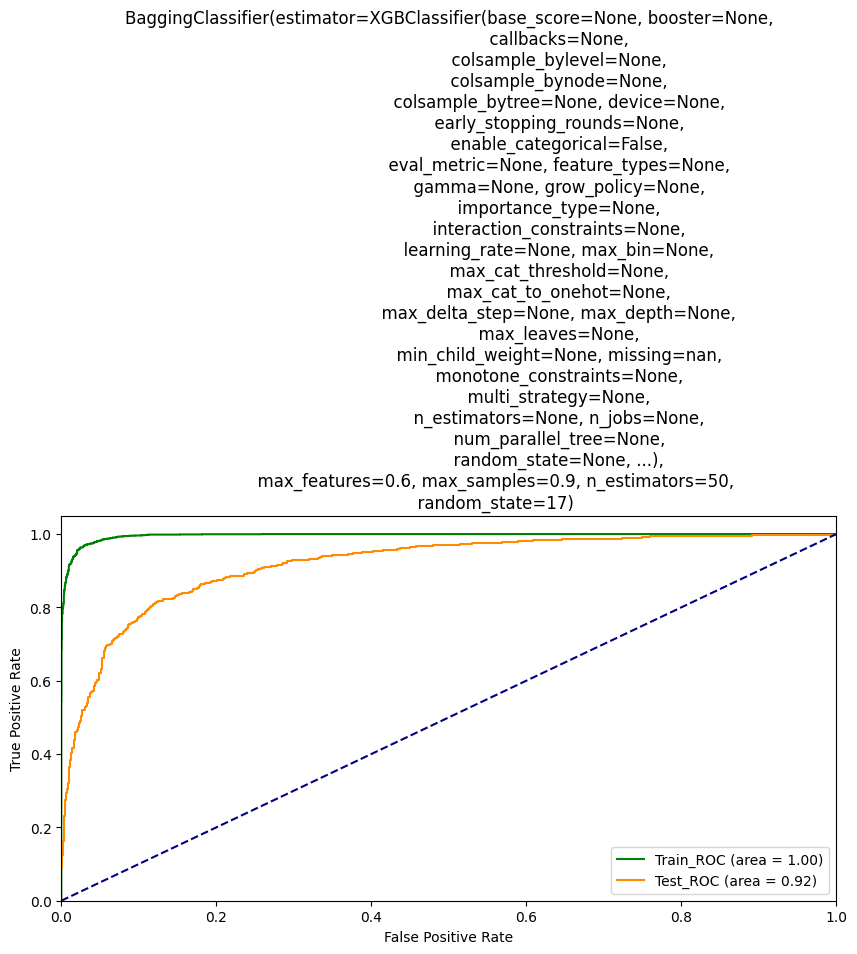

In [139]:
roc_cur(bc_best_param_D,x_t = x_train_D.to_numpy(), y_t = y_train_D.to_numpy(), x_ts = x_test_D.to_numpy(), y_ts = y_test_D.to_numpy())


In [140]:
### Voting

In [141]:
model_list_D

[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 RandomForestClassifier(),
 LogisticRegression(max_iter=1000),
 DecisionTreeClassifier(),
 KNeighborsClassifier()]

In [142]:
classifiers_names = ['xgb', 'rf', 'log_reg', 'dec_tree']
classifiers = list(model_list_D[:4])


In [143]:
gs_vc.fit(x_train_D.to_numpy(), y_train_D.to_numpy())

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('xgb',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_types=None,
                                                                   gamma=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_...
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...)),
                                                    ('rf',
                                                     RandomForestClassifier()),
                                                    ('log_reg',
                                                     LogisticRegression(max_iter=1000)),
                                                    ('dec_tree',
                                                     DecisionTreeClassifier())],
                                        voting='soft'),
             param_grid={}, scoring='roc_auc')

In [144]:
vc_best_param_D = gs_vc.best_estimator_

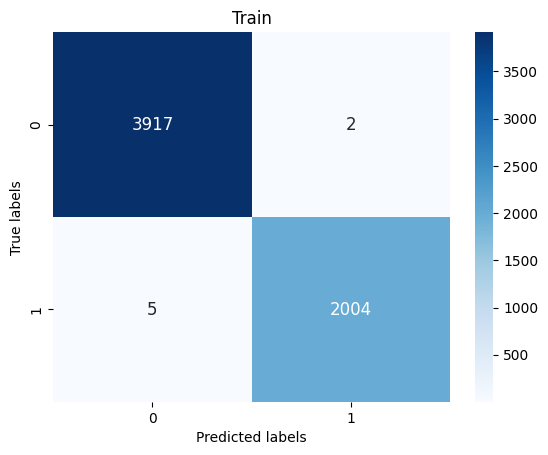

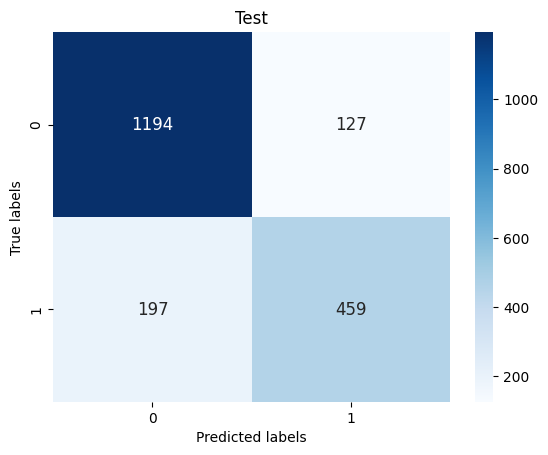

(None, None)

In [145]:
(
    tru_false_matrix(vc_best_param_D, x_train_D.to_numpy(), y_train_D.to_numpy()),
    
    tru_false_matrix(vc_best_param_D, x_test_D.to_numpy(), y_test_D.to_numpy())
    )

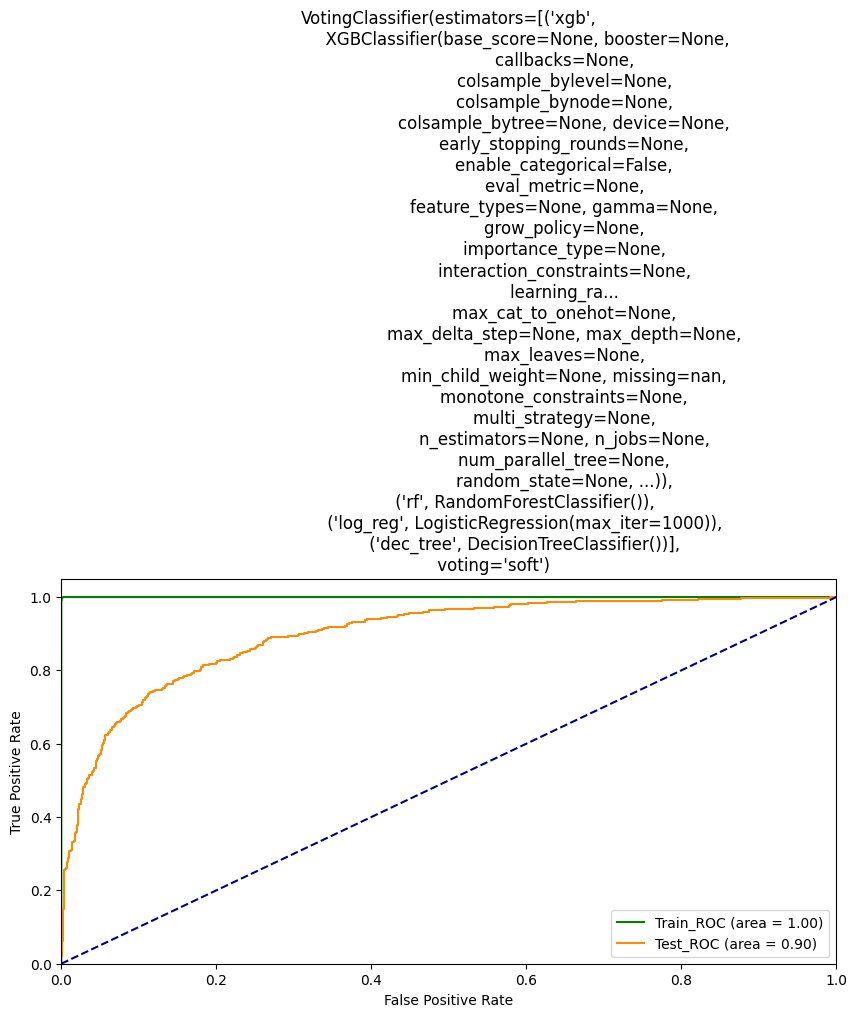

In [146]:
roc_cur(vc_best_param_D,x_t = x_train_D.to_numpy(), y_t = y_train_D.to_numpy(), x_ts = x_test_D.to_numpy(), y_ts = y_test_D.to_numpy())


Here it’s the other way around - we see that, with the exception of the first model, the rest have very strong retrainability, but we’ll take the first one as the final solution model


In [147]:
sample_submission['pr_D'] = pd.DataFrame(gs_best_param_D.predict_proba(d_test.to_numpy()))[1]

In [148]:
sample_submission

,id,pr_C,pr_CL,pr_D
0,7905,0.494452,0.019590,0.445059
1,7906,0.624740,0.043382,0.165075
2,7907,0.022237,0.295534,0.949935
3,7908,0.967414,0.006138,0.027067
4,7909,0.836817,0.012068,0.068969
...,...,...,...,...
5266,13171,0.865160,0.097826,0.060666
5267,13172,0.973678,0.004660,0.020794
5268,13173,0.859894,0.006788,0.101001
5269,13174,0.984980,0.029886,0.012913


In [149]:
sample_submission.shape

(5271, 4)

In [150]:
d_test.shape

(5271, 14)

We have, so to speak, the values of the distances of each point to three straight lines separating the classes from each other.
All we have to do is, through simple mathematical calculations, obtain a final table that will convert this data into the percentage probability that is required of us according to the assignment.

In [151]:
def final_check(sample_submission = sample_submission):
    sample_submission['sum'] = sample_submission['pr_CL'] + sample_submission['pr_D'] + sample_submission['pr_C']
    sample_submission['Status_C'] = sample_submission['pr_C'] / sample_submission['sum']
    sample_submission['Status_CL'] = sample_submission['pr_CL'] / sample_submission['sum']
    sample_submission['Status_D'] = sample_submission['pr_D'] / sample_submission['sum']
    return sample_submission[['id', 'Status_C', 'Status_CL', 'Status_D']]

In [152]:
final_check()

,id,Status_C,Status_CL,Status_D
0,7905,0.515537,0.020425,0.464038
1,7906,0.749810,0.052067,0.198123
2,7907,0.017541,0.233125,0.749334
3,7908,0.966816,0.006134,0.027050
4,7909,0.911710,0.013148,0.075142
...,...,...,...,...
5266,13171,0.845170,0.095566,0.059265
5267,13172,0.974524,0.004664,0.020812
5268,13173,0.888612,0.007014,0.104374
5269,13174,0.958358,0.029078,0.012564


In [153]:
sample_submission = final_check()

In [154]:
sample_submission

,id,Status_C,Status_CL,Status_D
0,7905,0.515537,0.020425,0.464038
1,7906,0.749810,0.052067,0.198123
2,7907,0.017541,0.233125,0.749334
3,7908,0.966816,0.006134,0.027050
4,7909,0.911710,0.013148,0.075142
...,...,...,...,...
5266,13171,0.845170,0.095566,0.059265
5267,13172,0.974524,0.004664,0.020812
5268,13173,0.888612,0.007014,0.104374
5269,13174,0.958358,0.029078,0.012564


In [177]:
# sample_submission.to_csv('submission.csv', index=False)